In [1]:
import pickle
import os
import yfinance as yf
from strategy.strategies import TradingRangeBreakout
import pandas as pd

In [2]:
def save_new_test_data(symbol):
    """download test data and save locally"""
    data = yf.download(symbol)
    assert not data.empty
    # Save data to pickle file
    with open(f'{symbol}.pickle', 'wb') as file:
        pickle.dump(data, file)
    
    return data

def get_data(symbol):
    # Check if pickle file exists
    if os.path.exists(f'{symbol}.pickle'):
        # Load data from pickle file
        with open(f'{symbol}.pickle', 'rb') as file:
            data = pickle.load(file)
    else:
        data = save_new_test_data(symbol)

    return data


In [3]:
data = get_data('../TSLA')

In [4]:
trb = TradingRangeBreakout(.61, .40)
trb.update(data.Close)
indicator_data = pd.DataFrame({
    'close': trb.price,
    'upper': trb.trading_range.upper,
    'lower': trb.trading_range.lower
})

<Axes: xlabel='Date'>

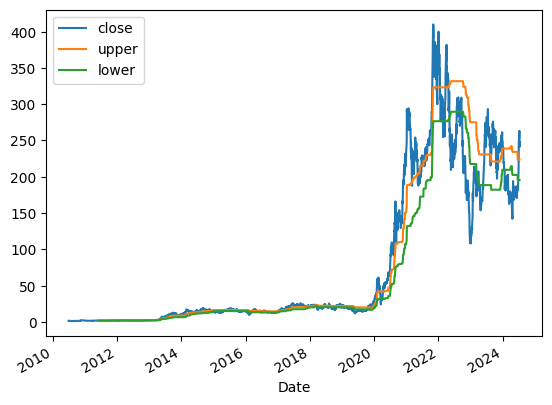

In [5]:
indicator_data.plot()

In [10]:
trb.log

,start,end,signal
0,2011-05-31,2011-06-07,1.0
1,2011-06-14,2011-06-14,1.0
2,2011-06-30,2011-07-08,1.0
3,2011-07-13,2011-07-13,1.0
4,2011-07-22,2011-07-22,1.0
...,...,...,...
119,2023-11-07,2023-11-08,1.0
120,2023-11-13,2024-01-02,1.0
121,2024-01-08,2024-01-08,1.0
122,2024-01-22,2024-06-25,-1.0


In [7]:
indicator_data.loc[trb.log.start, 'signal'] = indicator_data.close

In [8]:
# ax = indicator_data[['close', 'upper', 'lower']].plot()
df = indicator_data.reset_index()
# df[['Date', 'signal']].plot.scatter(x='Date', y='signal', ax=ax)


NameError: name 'ax' is not defined